based on: 
- https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data

In [ ]:
conda install -c anaconda scikit-learn

In [ ]:
conda install -c conda-forge py-xgboost

In [65]:
import numpy as np
import pandas as pd #to read the dataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [52]:
from xgboost import XGBRegressor

In [39]:
from sklearn.preprocessing import LabelEncoder

data collection & Analysis

In [5]:
test = pd.read_csv('train.csv')

In [6]:
test.head() #show the first five columns

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
#number of data points & number of features
test.shape

(8523, 12)

In [8]:
#getting some information about the dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<hr>

Cateogorical Features:
   - Item_identifier
   - Item_Fat_Content
   - Item_Type
   - Outlet_Identifier
   - Outlet_Size
   - Outlet_Location_Type
   - Outlet_Type

<hr>

In [9]:
#cheking for missing values
test.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling missing Values

<p>Mean -> average value</p>
<p>Mode -> most repeated value</p>

In [10]:
# mean value of "Iteam_weight" column
test['Item_Weight'].mean()

12.857645184136183

In [11]:
#filtring the missing values in "Item_weight" column with "Mean" value
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)

In [12]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Replacing the missing values in "Outlet_Size" with mode

In [16]:
mode_of_outlet_size = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [18]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [19]:
missing_values = test['Outlet_Size'].isnull()

In [20]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [21]:
test.loc[missing_values,'Outlet_Size'] = test.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [22]:
#checking for missing values
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Analysis

In [23]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
sns.set()

/Users/josecarro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


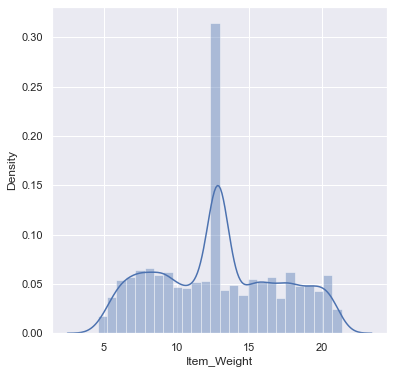

In [25]:
#Item_Weight_distribution
plt.figure(figsize=(6,6))
sns.distplot(test['Item_Weight'])
plt.show()

/Users/josecarro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


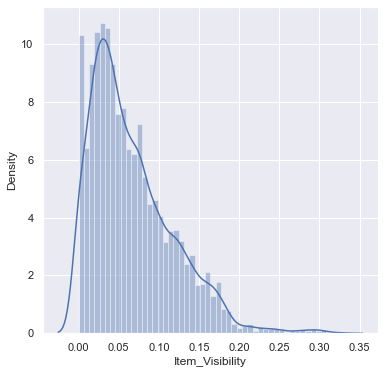

In [26]:
#Item_Visibility_distribution
plt.figure(figsize=(6,6))
sns.distplot(test['Item_Visibility'])
plt.show()

/Users/josecarro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


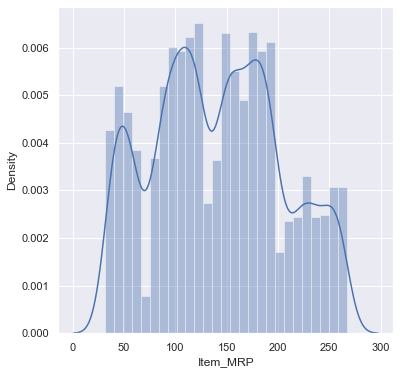

In [27]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(test['Item_MRP'])
plt.show()

/Users/josecarro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


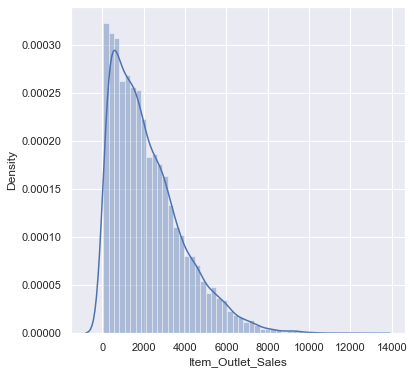

In [28]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(test['Item_Outlet_Sales'])
plt.show()

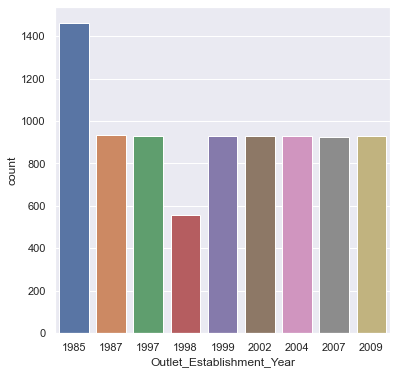

In [29]:
#Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=test)
plt.show()

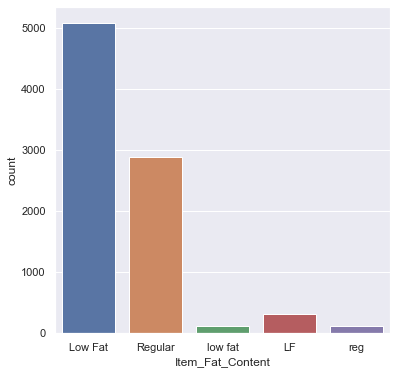

In [30]:
#Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=test)
plt.show()

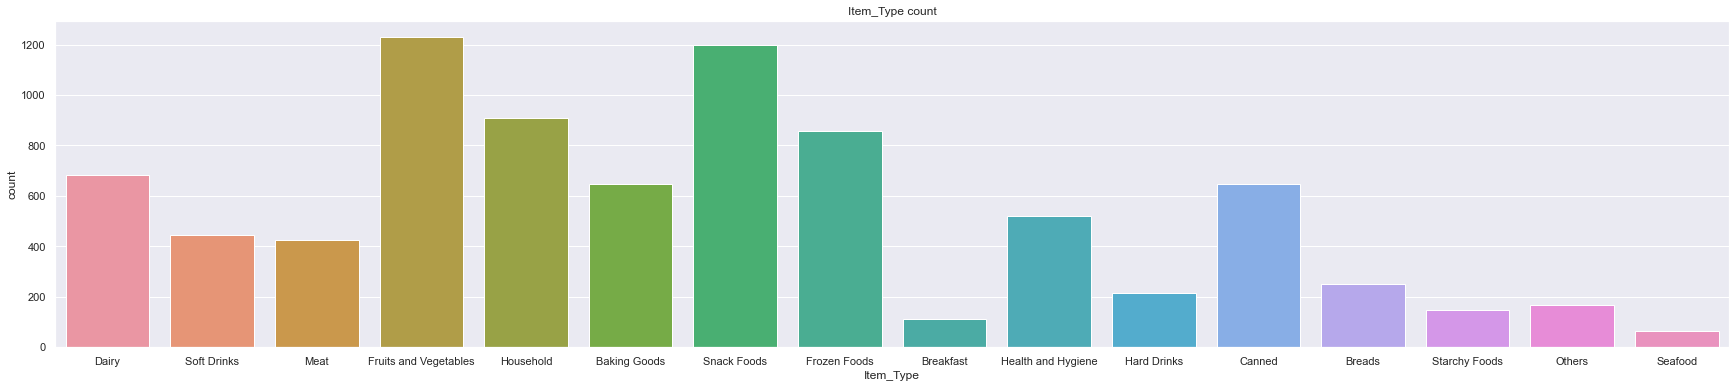

In [31]:
#Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=test)
plt.title('Item_Type count')
plt.show()

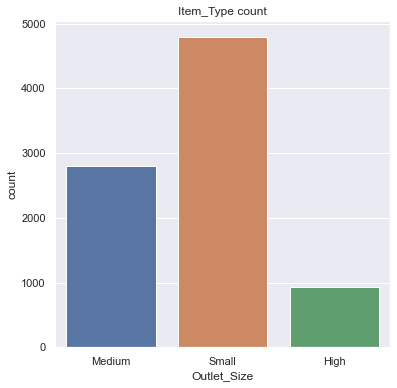

In [32]:
#Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=test)
plt.title('Item_Type count')
plt.show()

Data Pre-Processing

In [33]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
test['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [36]:
test.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace = True)

In [37]:
test['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Label Encoding

In [42]:
encoder = LabelEncoder()

In [43]:
test['Item_Identifier'] = encoder.fit_transform(test['Item_Identifier'])

In [44]:
test['Item_Fat_Content'] = encoder.fit_transform(test['Item_Fat_Content'])

test['Item_Type'] = encoder.fit_transform(test['Item_Type'])

test['Outlet_Identifier'] = encoder.fit_transform(test['Outlet_Identifier'])

test['Outlet_Size'] = encoder.fit_transform(test['Outlet_Size'])

test['Outlet_Location_Type'] = encoder.fit_transform(test['Outlet_Location_Type'])

test['Outlet_Type'] = encoder.fit_transform(test['Outlet_Type'])

In [45]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


#### Splitting features and Target

In [47]:
X = test.drop(columns='Item_Outlet_Sales', axis=1)
Y = test['Item_Outlet_Sales']

In [48]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

Splitting the data into Training data & testing Data

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state=2)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


#### Machine Learning Training Model

#### XGBoost Regressor

In [55]:
regressor = XGBRegressor()

In [57]:
regressor.fit(X_train, Y_train)

/Users/josecarro/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [58]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [59]:
#R square Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [62]:
print('R Squared value =',r2_train)

R Squared value = 0.8639680373364909


In [63]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)